## Compare variant calls: WGALN[bwamem/bcftools] vs GATK

In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [2]:
wgaln_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'

In [3]:
!ls -lh {wgaln_dir}/bwamem/*

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_7g8:
total 16M
-rw-rw-r-- 1 aliman aliman 677 Apr  8 16:48 3d7_7g8.log
-rw-rw-r-- 1 aliman aliman 16M Apr  8 16:48 3d7_7g8.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_dd2:
total 33M
-rw-rw-r-- 1 aliman aliman 679 Apr  8 16:51 3d7_dd2.log
-rw-rw-r-- 1 aliman aliman 33M Apr  8 16:51 3d7_dd2.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3:
total 548M
-rw-rw-r-- 1 aliman aliman  11M Apr 10 10:55 3d7_hb3.bam
-rw-rw-r-- 1 aliman aliman  15K Apr 10 10:55 3d7_hb3.bam.bai
-rw-rw-r-- 1 aliman aliman   96 Apr 10 10:56 3d7_hb3.bam.samples
-rw-rw-r-- 1 aliman aliman 776K Apr 10 11:00 3d7_hb3.bcftools_m.vcf.gz
-rw-rw-r-- 1 aliman aliman  11K Apr 10 11:00 3d7_hb3.bcftools_m.vcf.gz.tbi
-rw-rw-r-- 1 aliman aliman  47M Apr 11 00:02 3d7_hb3_custom.bam
-rw-rw-r-- 1 aliman aliman  17K Apr 11 00:02 3d7_hb3_custom.bam.bai
-rw-rw-r-- 1 aliman aliman  103 A

In [4]:
fasta_fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'
genome = pyfasta.Fasta(fasta_fn)

In [5]:
method = 'bwamem'
alignment = '3d7_hb3'
#suffix = ''
#suffix = '_intractg'
suffix = '_custom'
sam_fn = os.path.join(wgaln_dir, method, alignment, '%s%s.sam' % (alignment, suffix))
!ls -lh {sam_fn}
bam_fn = sam_fn[:-3] + 'bam'
!ls -lh {bam_fn}
laat_vcf_fn = bam_fn[:-3] + 'laat.vcf.gz'
!ls -lh {laat_vcf_fn}

-rw-rw-r-- 1 aliman aliman 182M Apr 11 00:01 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3_custom.sam
-rw-rw-r-- 1 aliman aliman 47M Apr 11 00:02 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3_custom.bam
-rw-rw-r-- 1 aliman aliman 612K Apr 10 23:31 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3_custom.laat.vcf.gz


In [6]:
!rm -v /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3_custom.laat.vcf.gz.vcfnp_cache/variants.npy

removed ‘/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3_custom.laat.vcf.gz.vcfnp_cache/variants.npy’


In [7]:
variants_wgaln = vcfnp.variants(laat_vcf_fn, 
                                fields=['CHROM', 'POS', 'REF', 'ALT'],
                                arities={'ALT': 1},
                                dtypes={'REF': 'S100', 'ALT': 'S100'},
                                cache=False,)
variants_wgaln

[vcfnp] 2015-04-11 00:12:07.997056 :: caching is disabled
[vcfnp] 2015-04-11 00:12:07.997528 :: building array


array([(b'Pf3D7_01_v3', 7361, b'C', b'G'),
       (b'Pf3D7_01_v3', 7363, b'C', b'T'),
       (b'Pf3D7_01_v3', 8121, b'A', b'G'), ...,
       (b'Pf3D7_14_v3', 3290455, b'C', b'T'),
       (b'Pf3D7_14_v3', 3290462, b'C', b'G'),
       (b'Pf3D7_14_v3', 3290473, b'C', b'T')], 
      dtype=[('CHROM', 'S12'), ('POS', '<i4'), ('REF', 'S100'), ('ALT', 'S100')])

In [8]:
callset_ngs = np.load('/data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.gatk.final.npz')
callset_ngs.keys()

['calldata', 'variants']

In [9]:
callset_ngs['calldata'].dtype.names

('3D7/PG0051-C/ERR019061',
 'HB3/PG0052-C/ERR019054',
 'C01/PG0062-C/ERR019070',
 'C01/PG0065-C/ERR019064',
 'C02/PG0053-C/ERR019067',
 'C02/PG0055-C/ERR019066',
 'C02/PG0056-C/ERR019068',
 'C02/PG0067-C/ERR019073',
 'C03/PG0066-C/ERR019072',
 'C04/PG0061-C/ERR019059',
 'C05/PG0068-C/ERR019065',
 'C06/PG0069-C/ERR019055',
 'C07/PG0070-C/ERR019056',
 'C08/PG0071-C/ERR019074',
 'C09/PG0072-C/ERR019057',
 'C10/PG0063-C/ERR019060',
 'C11/PG0064-C/ERR019071',
 'C12/PG0058-C/ERR019063',
 'C13/PG0054-C/ERR019062',
 'C14/PG0060-C/ERR019058',
 'C15/PG0057-C/ERR019069')

In [10]:
filter_pass_ngs = callset_ngs['variants']['FILTER_PASS']

In [11]:
genotype_ngs = vcfnp.view2d(callset_ngs['calldata'])['genotype']
genotype_ngs.shape

(191886, 21)

In [12]:
clone_is_alt_ngs = genotype_ngs[:, 1] == 1

In [13]:
nnz(filter_pass_ngs)

36598

In [14]:
nnz(clone_is_alt_ngs)

128393

In [15]:
nnz(filter_pass_ngs & clone_is_alt_ngs)

36558

In [16]:
# obtain variants
variants_ngs = callset_ngs['variants'][filter_pass_ngs & clone_is_alt_ngs]

In [17]:
tbl_regions_1b

0|region_chrom,1|region_start,2|region_stop,3|region_type,4|region_size
Pf3D7_01_v3,1,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27337,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92901,457931,Core,365031
Pf3D7_01_v3,457932,460311,Centromere,2380
Pf3D7_01_v3,460312,575900,Core,115589


In [18]:
def tabulate_variants_ngs(chrom):
    tbl = (etl
        .fromarray(variants_ngs[variants_ngs['CHROM'] == chrom])
        .cut('CHROM', 'POS', 'REF', 'ALT')
        .convert(['CHROM', 'REF'], lambda v: str(v, 'ascii'))
        .convert('ALT', lambda v: str(v[0], 'ascii'))
        .addfield('svlen', lambda row: len(row.ALT) - len(row.REF))
        .addfield('vtype', lambda row: 'SNP' if row.svlen == 0 else 'DEL' if row.svlen < 0 else 'INS')
    )
    return tbl

In [19]:
tbl_variants_ngs = tabulate_variants_ngs(b'Pf3D7_01_v3')
tbl_variants_ngs.display(5)
tbl_variants_ngs.nrows()

0|CHROM,1|POS,2|REF,3|ALT,4|svlen,5|vtype
Pf3D7_01_v3,93901,AATATATATAT,A,-10,DEL
Pf3D7_01_v3,94590,T,TATAC,4,INS
Pf3D7_01_v3,94993,CATATAT,C,-6,DEL
Pf3D7_01_v3,95518,G,T,0,SNP
Pf3D7_01_v3,95621,T,A,0,SNP


1002

In [21]:
# def trim_alleles(a, b):
#     if (len(a) > 1) and (len(b) > 1):
#         if a.startswith(b):
#             a = a[0] + 

In [22]:
def tabulate_variants_wgaln(chrom):
    tbl = (etl
        .fromarray(variants_wgaln[variants_wgaln['CHROM'] == chrom])
        .convert(['CHROM', 'REF', 'ALT'], lambda v: str(v, 'ascii'))
        .intervalleftjoin(tbl_regions_1b, 
                          lkey='CHROM', rkey='region_chrom', 
                          lstart='POS', lstop='POS', 
                          rstart='region_start', rstop='region_stop',
                          include_stop=True)
        .eq('region_type', 'Core')
        .cutout(4, 5, 6, 7, 8)
        .addfield('svlen', lambda row: len(row.ALT) - len(row.REF))
        .addfield('vtype', lambda row: 'SNP' if row.svlen == 0 else 'DEL' if row.svlen < 0 else 'INS')
    )
    return tbl

In [23]:
tbl_variants_wgaln = tabulate_variants_wgaln(b'Pf3D7_01_v3')
tbl_variants_wgaln.display(5)
tbl_variants_wgaln.nrows()

0|CHROM,1|POS,2|REF,3|ALT,4|svlen,5|vtype
Pf3D7_01_v3,93901,AATATATATATATATATATATATATATATATATATATATA,AATATATATATATATATATATATATATATA,-10,DEL
Pf3D7_01_v3,94590,TATA,TATACATA,4,INS
Pf3D7_01_v3,94993,CATATATATATATATATATATATATATAT,CATATATATATATATATATATAT,-6,DEL
Pf3D7_01_v3,95518,G,T,0,SNP
Pf3D7_01_v3,95621,T,A,0,SNP


1478

In [24]:
tbl_exons

0|feature_chrom,1|feature_type,2|feature_start,3|feature_stop,4|feature_length,5|feature_strand,6|feature_id,7|feature_parent_id,8|feature_name,9|feature_previous_id,10|feature_region_type,11|feature_region_size
Pf3D7_01_v3,CDS,29510,34762,5252,+,PF3D7_0100100.1:exon:1,PF3D7_0100100.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,35888,37126,1238,+,PF3D7_0100100.1:exon:2,PF3D7_0100100.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,38982,39923,941,-,PF3D7_0100200.1:exon:1,PF3D7_0100200.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,40154,40207,53,-,PF3D7_0100200.1:exon:2,PF3D7_0100200.1,None,None,SubtelomericHypervariable,65564
Pf3D7_01_v3,CDS,42367,43617,1250,-,PF3D7_0100300.1:exon:1,PF3D7_0100300.1,None,None,SubtelomericHypervariable,65564


In [25]:
def common_prefix(a, b):
    if len(a) == len(b):
        return a == b
    elif len(a) > len(b):
        return a.startswith(b)
    else:
        return b.startswith(a)
    

def tabulate_variants_joined(chrom):
    cov_wgaln = pysamstats.load_coverage(bam_fn, chrom=str(chrom, 'ascii'), pad=True)
    tbl_variants_ngs = tabulate_variants_ngs(chrom)
    tbl_variants_wgaln = tabulate_variants_wgaln(chrom)
    tbl = (tbl_variants_ngs
        .outerjoin(tbl_variants_wgaln, key=('CHROM', 'POS'), lprefix='ngs_', rprefix='wgaln_')
        .rename({0: 'CHROM', 1: 'POS'})
        .addfield('false_positive_site', lambda row: (row.ngs_REF is not None) and (row.wgaln_REF is None))
        .addfield('false_negative_site', lambda row: (row.ngs_REF is None) and (row.wgaln_REF is not None))
        .addfield('true_positive_site', lambda row: (row.ngs_REF is not None) and (row.wgaln_REF is not None)) 
        .addfield('type_match', lambda row: ((row.ngs_vtype is not None) and (row.ngs_vtype == row.wgaln_vtype)))
        .addfield('allele_match', lambda row: (row.ngs_REF == row.wgaln_REF) and (row.ngs_ALT == row.wgaln_ALT)) 
        .addfield('prefix_match', lambda row: (row.type_match and common_prefix(row.ngs_ALT, row.wgaln_ALT) and common_prefix(row.ngs_REF, row.wgaln_REF)))
        .addfield('coverage_wgaln', lambda row: cov_wgaln.reads_all[row.POS - 1])
        .intervalleftjoin(tbl_exons, lkey='CHROM', rkey='feature_chrom', 
                          lstart='POS', lstop='POS', 
                          rstart='feature_start', rstop='feature_stop', include_stop=True) 
        .rename('feature_id', 'cds_id')
        .replace('cds_id', None, '.')
        .cutout('feature_chrom', 'feature_start', 'feature_stop', 'feature_length', 'feature_strand', 'feature_type', 'feature_name', 'feature_parent_id', 'feature_previous_id', 'feature_region_type', 'feature_region_size')
        .gt('coverage_wgaln', 0)
    )
    return tbl

In [26]:
tbl_variants_joined = tabulate_variants_joined(b'Pf3D7_01_v3')
def _tr_style(row):
    style = 'background-color: %s' % ('#0f0' if row.allele_match 
                                      else '#af0' if row.type_match
                                      else '#ff0' if row.true_positive_site
                                      else '#f44' if row.false_positive_site
                                      else '#44f' if row.false_negative_site
                                      else 'white')
    return style
tbl_variants_joined.display(200, tr_style=_tr_style)


0|CHROM,1|POS,2|ngs_REF,3|ngs_ALT,4|ngs_svlen,5|ngs_vtype,6|wgaln_REF,7|wgaln_ALT,8|wgaln_svlen,9|wgaln_vtype,10|false_positive_site,11|false_negative_site,12|true_positive_site,13|type_match,14|allele_match,15|prefix_match,16|coverage_wgaln,17|cds_id
Pf3D7_01_v3,93901,AATATATATAT,A,-10,DEL,AATATATATATATATATATATATATATATATATATATATA,AATATATATATATATATATATATATATATA,-10,DEL,False,False,True,True,False,True,1,.
Pf3D7_01_v3,94590,T,TATAC,4,INS,TATA,TATACATA,4,INS,False,False,True,True,False,True,1,.
Pf3D7_01_v3,94993,CATATAT,C,-6,DEL,CATATATATATATATATATATATATATAT,CATATATATATATATATATATAT,-6,DEL,False,False,True,True,False,True,1,.
Pf3D7_01_v3,95518,G,T,0,SNP,G,T,0,SNP,False,False,True,True,True,True,1,.
Pf3D7_01_v3,95621,T,A,0,SNP,T,A,0,SNP,False,False,True,True,True,True,1,.
Pf3D7_01_v3,95632,G,A,0,SNP,G,A,0,SNP,False,False,True,True,True,True,1,.
Pf3D7_01_v3,95641,G,A,0,SNP,G,A,0,SNP,False,False,True,True,True,True,1,.
Pf3D7_01_v3,95680,A,G,0,SNP,A,G,0,SNP,False,False,True,True,True,True,1,.
Pf3D7_01_v3,95685,G,T,0,SNP,None,None,None,None,True,False,False,False,False,False,1,.
Pf3D7_01_v3,95686,A,C,0,SNP,None,None,None,None,True,False,False,False,False,False,1,.


In [27]:
def plot_variant_density(variants, chrom, window=5000, ax=None):
    v = variants[variants['CHROM'] == chrom]
    seq = np.asarray(genome[str(chrom, 'ascii')])
    counts, windows = allel.stats.windowed_count(v['POS'], size=window, start=1, stop=seq.size)
    y = counts / window
    x = windows.mean(axis=1)
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 1))
        sns.despine(ax=ax, offset=5)
    ax.plot(x, y)
    ax.set_xlim(0, seq.size)

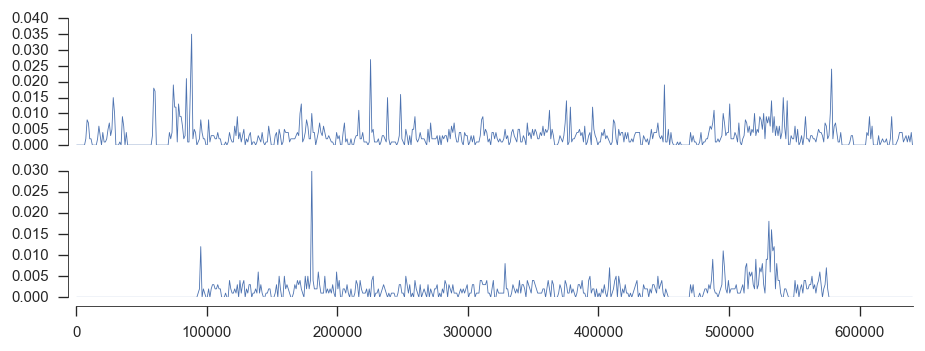

In [28]:
chrom = b'Pf3D7_01_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

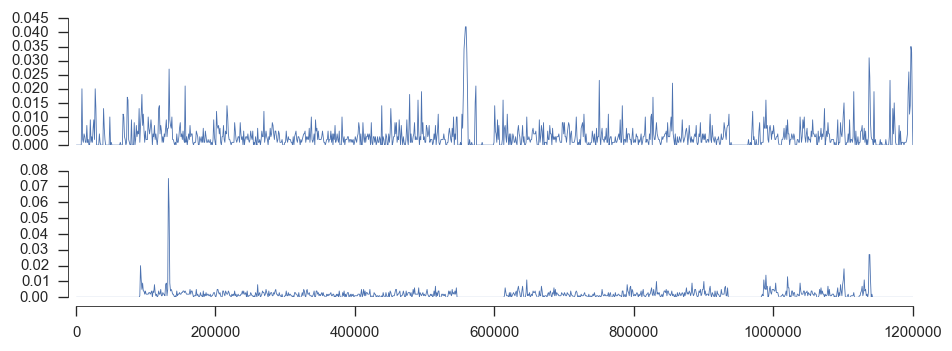

In [29]:
chrom = b'Pf3D7_04_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

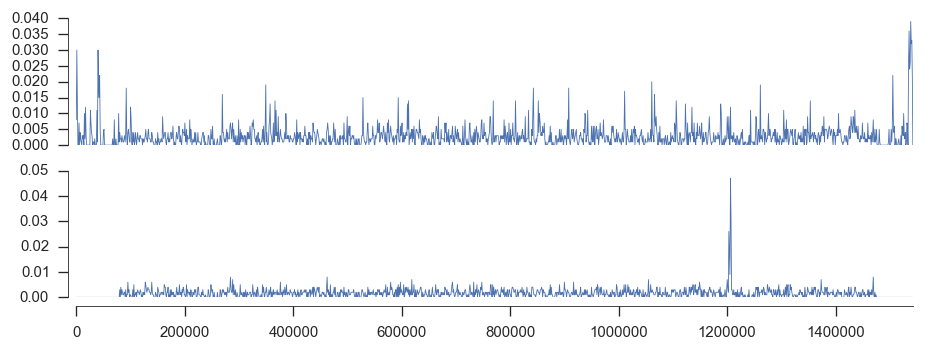

In [30]:
chrom = b'Pf3D7_09_v3'
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(2, 1, 1)
sns.despine(ax=ax, bottom=True, offset=5)
plot_variant_density(variants_wgaln, chrom, window=1000, ax=ax)
ax.set_xticks([])
ax = fig.add_subplot(2, 1, 2)
sns.despine(ax=ax, offset=5)
plot_variant_density(variants_ngs, chrom, window=1000, ax=ax)

In [31]:
def eval_performance(chrom, window=1000):
    tbl_variants_joined = tabulate_variants_joined(chrom)
    df = tbl_variants_joined.cut('POS', 'ngs_vtype', 'wgaln_vtype', 'false_positive_site', 'false_negative_site', 'true_positive_site', 'type_match', 'allele_match', 'prefix_match', 'cds_id').todataframe()
    is_snp = (df.ngs_vtype == 'SNP')
    is_indel = (df.ngs_vtype == 'INS') | (df.ngs_vtype == 'DEL')
    is_coding = (df.cds_id != '.')
    log('is_coding', nnz(is_coding), nnz(~is_coding))
    pos = df.POS
    seq = np.asarray(genome[str(chrom, 'ascii')])

    pos_site_fp = pos[df.false_positive_site]
    pos_site_tp = pos[df.true_positive_site]
    pos_site_fn = pos[df.false_negative_site]
    counts_fp, windows = allel.stats.windowed_count(pos_site_fp, size=window, start=1, stop=seq.size)
    counts_tp, _ = allel.stats.windowed_count(pos_site_tp, size=window, start=1, stop=seq.size)
    counts_fn, _ = allel.stats.windowed_count(pos_site_fn, size=window, start=1, stop=seq.size)
    
    # plot counts
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=5)
    x = windows.mean(axis=1)
    ax.plot(x, counts_tp, lw=1, label='TP', color='g')
    ax.plot(x, counts_fp, lw=1, label='FP', color='r')
    ax.plot(x, counts_fn, lw=1, label='FN', color='b')
    ax.set_xlim(1, seq.size)
    ax.set_ylabel('#variants')
    ax.set_title('TP/FP/FN')
    ax.set_xlabel(str(chrom, 'ascii'))
    ax.legend()
    
    # plot site FDR
    windowed_fdr = counts_fp / (counts_fp + counts_tp)    
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=5)
    x = windows.mean(axis=1)
    y = windowed_fdr
    ax.plot(x, y, lw=1)
    ax.set_xlim(1, seq.size)
    ax.set_ylabel('FDR')
    ax.set_title('site FDR')
    ax.set_xlabel(str(chrom, 'ascii'))
    
    # plot site sensitivity
    windowed_sensitivity = counts_tp / (counts_tp + counts_fn)
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=5)
    x = windows.mean(axis=1)
    y = windowed_sensitivity
    ax.plot(x, y, lw=1)
    ax.set_xlim(1, seq.size)
    ax.set_ylabel('sensitivity')
    ax.set_title('site sensitivity')
    ax.set_xlabel(str(chrom, 'ascii'))
    
    # site FDR, defined as #sites only discovered by NGS / total #sites discovered by NGS
    n_site_fp = nnz(df.false_positive_site)
    n_site_tp = nnz(df.true_positive_site)
    fdr_site = n_site_fp / (n_site_fp + n_site_tp)
    print('site FDR', fdr_site)
    
    # coding site FDR, defined as #sites only discovered by NGS / total #sites discovered by NGS
    n_site_fp = nnz(is_coding & df.false_positive_site)
    n_site_tp = nnz(is_coding & df.true_positive_site)
    fdr_site = n_site_fp / (n_site_fp + n_site_tp)
    print('coding site FDR', fdr_site)
    
    # non-coding site FDR, defined as #sites only discovered by NGS / total #sites discovered by NGS
    n_site_fp = nnz(~is_coding & df.false_positive_site)
    n_site_tp = nnz(~is_coding & df.true_positive_site)
    fdr_site = n_site_fp / (n_site_fp + n_site_tp)
    print('non-coding site FDR', fdr_site)
    
    # site sensitivity, defined as #sites discovered by both NGS and wgaln / total #sites discovered by wgaln
    n_site_tp = nnz(df.true_positive_site)
    n_site_fn = nnz(df.false_negative_site)
    sensitivity_site = n_site_tp / (n_site_tp + n_site_fn)
    print('site sensitivity', sensitivity_site)

    # coding site sensitivity, defined as #sites discovered by both NGS and wgaln / total #sites discovered by wgaln
    n_site_tp = nnz(is_coding & df.true_positive_site)
    n_site_fn = nnz(is_coding & df.false_negative_site)
    sensitivity_site = n_site_tp / (n_site_tp + n_site_fn)
    print('coding site sensitivity', sensitivity_site)

    # non-coding site sensitivity, defined as #sites discovered by both NGS and wgaln / total #sites discovered by wgaln
    n_site_tp = nnz(~is_coding & df.true_positive_site)
    n_site_fn = nnz(~is_coding & df.false_negative_site)
    sensitivity_site = n_site_tp / (n_site_tp + n_site_fn)
    print('non-coding site sensitivity', sensitivity_site)

    # SNP FDR, defined as #SNPs only discovered by NGS / total #SNPs discovered by NGS
    n_snp_fp = nnz(is_snp & ~df.allele_match)
    n_snp_tp = nnz(is_snp & df.allele_match)
    fdr_snp = n_snp_fp / (n_snp_fp + n_snp_tp)
    print('SNP FDR', fdr_snp)
    
    # coding SNP FDR, defined as #SNPs only discovered by NGS / total #SNPs discovered by NGS
    n_snp_fp = nnz(is_coding & is_snp & ~df.allele_match)
    n_snp_tp = nnz(is_coding & is_snp & df.allele_match)
    fdr_snp = n_snp_fp / (n_snp_fp + n_snp_tp)
    print('coding SNP FDR', fdr_snp)
    
    # non-coding SNP FDR, defined as #SNPs only discovered by NGS / total #SNPs discovered by NGS
    n_snp_fp = nnz(~is_coding & is_snp & ~df.allele_match)
    n_snp_tp = nnz(~is_coding & is_snp & df.allele_match)
    fdr_snp = n_snp_fp / (n_snp_fp + n_snp_tp)
    print('non-coding SNP FDR', fdr_snp)
    
    # SNP sensitivity, defined as #SNPs discovered by both NGS and wgaln / total #SNPs discovered by wgaln
    n_snp_tp = nnz(is_snp & df.allele_match)
    n_snp_fn = nnz((df.wgaln_vtype == 'SNP') & ~df.allele_match)
    sensitivity_snp = n_snp_tp / (n_snp_tp + n_snp_fn)
    print('SNP sensitivity', sensitivity_snp)

    # coding SNP sensitivity, defined as #SNPs discovered by both NGS and wgaln / total #SNPs discovered by wgaln
    n_snp_tp = nnz(is_coding & is_snp & df.allele_match)
    n_snp_fn = nnz(is_coding & (df.wgaln_vtype == 'SNP') & ~df.allele_match)
    sensitivity_snp = n_snp_tp / (n_snp_tp + n_snp_fn)
    print('coding SNP sensitivity', sensitivity_snp)

    # non-coding SNP sensitivity, defined as #SNPs discovered by both NGS and wgaln / total #SNPs discovered by wgaln
    n_snp_tp = nnz(~is_coding & is_snp & df.allele_match)
    n_snp_fn = nnz(~is_coding & (df.wgaln_vtype == 'SNP') & ~df.allele_match)
    sensitivity_snp = n_snp_tp / (n_snp_tp + n_snp_fn)
    print('non-coding SNP sensitivity', sensitivity_snp)

    # INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(is_indel & ~df.prefix_match)
    n_indel_tp = nnz(is_indel & df.prefix_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('INDEL FDR (prefix match)', fdr_indel)

    # coding INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(is_coding & is_indel & ~df.prefix_match)
    n_indel_tp = nnz(is_coding & is_indel & df.prefix_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('coding INDEL FDR (prefix match)', fdr_indel)

    # non-coding INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(~is_coding & is_indel & ~df.prefix_match)
    n_indel_tp = nnz(~is_coding & is_indel & df.prefix_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('non-coding INDEL FDR (prefix match)', fdr_indel)

    # INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_tp = nnz(is_indel & df.prefix_match)
    n_indel_fn = nnz(is_indel_wgaln & ~df.prefix_match)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('INDEL sensitivity (prefix match)', sensitivity_indel)

    # coding INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_tp = nnz(is_coding & is_indel & df.prefix_match)
    n_indel_fn = nnz(is_coding & is_indel_wgaln & ~df.prefix_match)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('coding INDEL sensitivity (prefix match)', sensitivity_indel)

    # non-coding INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_tp = nnz(~is_coding & is_indel & df.prefix_match)
    n_indel_fn = nnz(~is_coding & is_indel_wgaln & ~df.prefix_match)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('non-coding INDEL sensitivity (prefix match)', sensitivity_indel)

    # INDEL FDR, defined as #INDELs only discovered by NGS / total #INDELs discovered by NGS
    n_indel_fp = nnz(is_indel & ~df.allele_match)
    n_indel_tp = nnz(is_indel & df.allele_match)
    fdr_indel = n_indel_fp / (n_indel_fp + n_indel_tp)
    print('INDEL FDR (allele match)', fdr_indel)

    # INDEL sensitivity, defined as #INDELs discovered by both NGS and wgaln / total #INDELs discovered by wgaln
    is_indel_wgaln = (df.wgaln_vtype == 'INS') | (df.wgaln_vtype == 'DEL')
    n_indel_fn = nnz(is_indel_wgaln & ~df.allele_match)
    sensitivity_indel = n_indel_tp / (n_indel_tp + n_indel_fn)
    print('INDEL sensitivity (allele match)', sensitivity_indel)


2015-04-11 00:13:22.895336 :: is_coding 490 1197


site FDR 0.24745417515274948
coding site FDR 0.24281150159744408
non-coding site FDR 0.24962630792227206
site sensitivity 0.5117728531855956
coding site sensitivity 0.572463768115942
non-coding site sensitivity 0.487378640776699
SNP FDR 0.19571045576407506
coding SNP FDR 0.25
non-coding SNP FDR 0.09774436090225563
SNP sensitivity 0.40160642570281124
coding SNP sensitivity 0.5825242718446602
non-coding SNP sensitivity 0.273972602739726
INDEL FDR (prefix match) 0.2922824302134647
coding INDEL FDR (prefix match) 0.2465753424657534
non-coding INDEL FDR (prefix match) 0.29850746268656714
INDEL sensitivity (prefix match) 0.6183644189383071
coding INDEL sensitivity (prefix match) 0.5238095238095238
non-coding INDEL sensitivity (prefix match) 0.6351351351351351
INDEL FDR (allele match) 0.9917898193760263
INDEL sensitivity (allele match) 0.007173601147776184


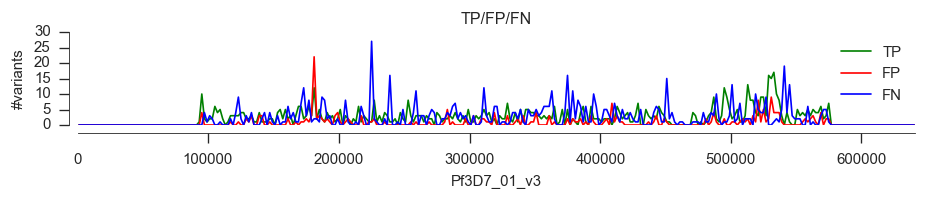

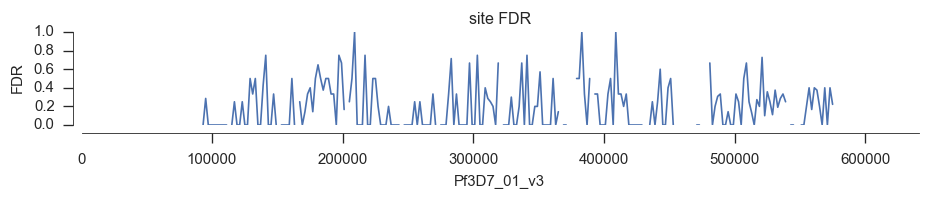

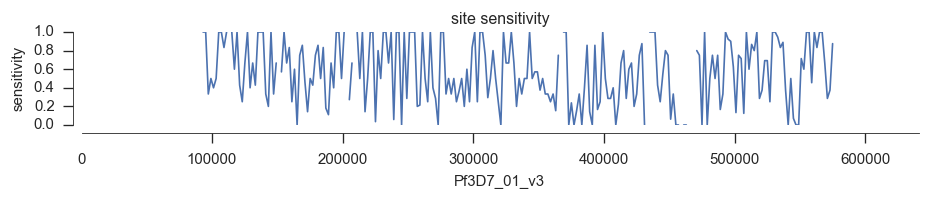

In [32]:
eval_performance(b'Pf3D7_01_v3', window=2000)

2015-04-11 00:13:34.158946 :: is_coding 2188 6701


site FDR 0.16735905044510385
coding site FDR 0.12953367875647667
non-coding site FDR 0.18115550755939525
site sensitivity 0.5233121969414397
coding site sensitivity 0.5842026825633383
non-coding site sensitivity 0.5029850746268657
SNP FDR 0.10832811521603006
coding SNP FDR 0.11550802139037433
non-coding SNP FDR 0.09818731117824774
SNP sensitivity 0.3613296117736615
coding SNP sensitivity 0.5755045233124565
non-coding SNP sensitivity 0.2384185303514377
INDEL FDR (prefix match) 0.19924812030075187
coding INDEL FDR (prefix match) 0.17067307692307693
non-coding INDEL FDR (prefix match) 0.20315581854043394
INDEL sensitivity (prefix match) 0.6750365675280351
coding INDEL sensitivity (prefix match) 0.5989583333333334
non-coding INDEL sensitivity (prefix match) 0.6874645490640953
INDEL FDR (allele match) 0.9887218045112782
INDEL sensitivity (allele match) 0.009507557289127255


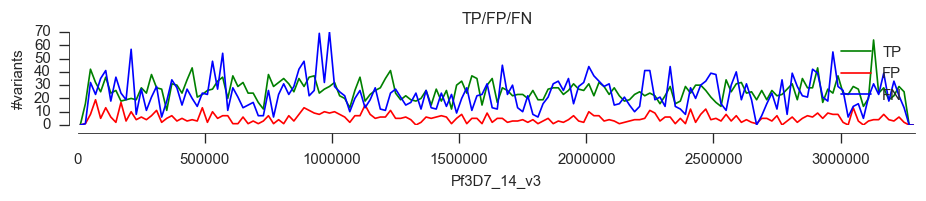

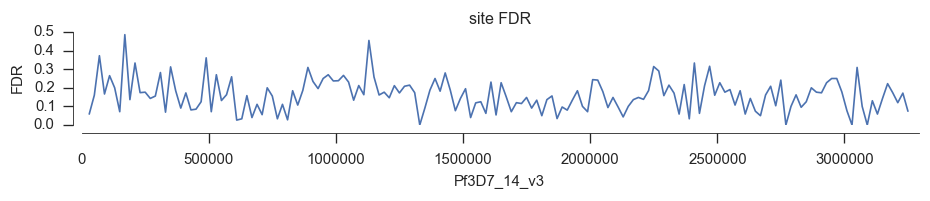

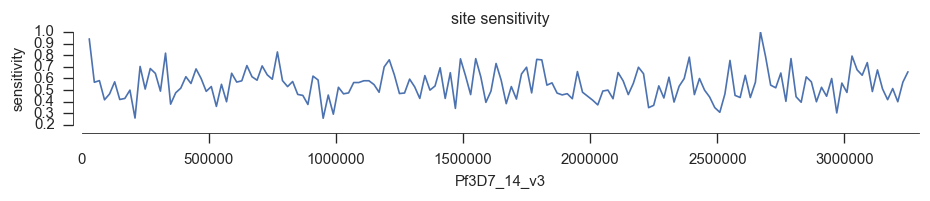

In [33]:
eval_performance(b'Pf3D7_14_v3', window=20000)